# PSF calculation with Poppy

## Goal simulate effect of gratings including hologram on. the PSF including the orders 0,1,2 of diffraction and understand Fourier optics
- author : Sylvie Dagoret-Campagne
- aflilation IJCLab/IN2P3/CNRS
- creation date 2025-01-10
- last update : 2025-01-11
- conda environnement : poppy_conda_py312 (on my macbook)
- install poppy : https://poppy-optics.readthedocs.io/en/latest/
- install rise in jupyterlab to see the slides : https://github.com/jupyterlab-contrib/rise
- install pandoc for documentation

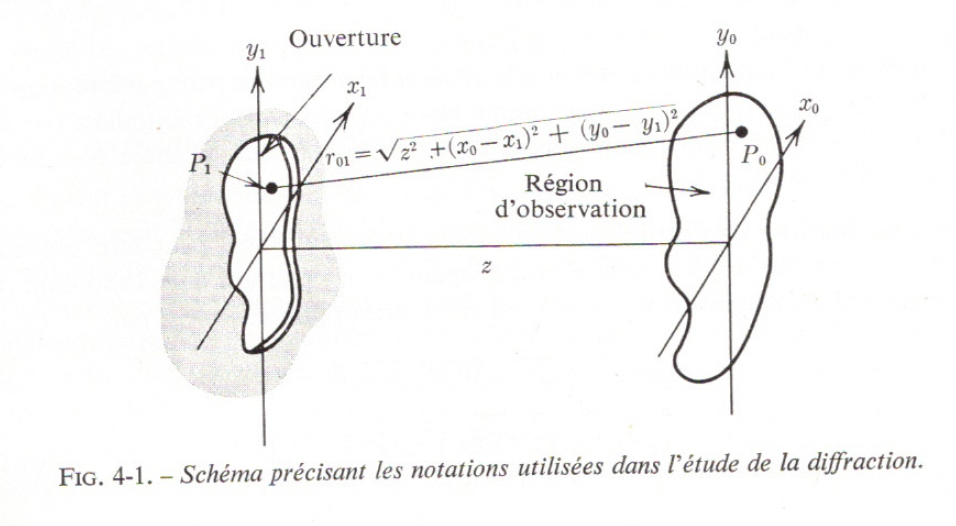

In [1]:
from IPython.display import Image
Image(filename = "Figs/fig_aperturediffraction.png",width=500,height=100)

## Reminder of Diffraction by an aperture $(x_1,y_1)$ seen on a screen at $(x_0,y_0)$ 
(Goodmann book on Fourier optics)
- in Fresnel approximation (spherical wave $\rightarrow$ quadratic terms in propagation term $\frac{e^{ikr_{01}}}{j\lambda z}$~:$z^3 \gg \frac{\pi}{4\lambda}\left( (x_0-x_1)^2 + (y_0-y_1)^2 \right)^2|_{max} $:
$$
U(x_0,y_0) = \frac{exp(jkz)}{jkz} \exp\left(j \frac{k}{2z}(x_0^2+y_0^2) \right) \int \int \left\{ U(x_1,y_1) \exp\left(  j \frac{k}{2z}(x_1^2+y_1^2)\right)\right\} \times \exp \left\{ -j \frac{2 \pi}{\lambda z}(x_0x_1+y_0y_1)
\right\}dx_1 dy_1
$$
- in Fraunhoffer approximation $ z \gg \frac{k(x_1^2+y_1^2)}{2}|_{max}$:
$$
U(x_0,y_0) = \frac{exp(jkz)}{jkz} \exp\left(j \frac{k}{2z}(x_0^2+y_0^2) \right) \int \int  U(x_1,y_1)  \times \exp \left\{ -j \frac{2 \pi}{\lambda z}(x_0x_1+y_0y_1)
\right\}dx_1 dy_1
$$
- The Fraunoffer approximation solution is proportional to the Fourier transform of $U(x_1,y_1)$ at frequency $(f_X,f_Y) = (\frac{x_0}{\lambda z}, \frac{y_0}{\lambda z}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- The Fresnel pproximation solution is proportional to the Fourier transform of $\left \{ U(x_1,y_1) \cdot \exp\left(  j \frac{k}{2z}(x_1^2+y_1^2)\right) \right\}$ at frequency $(f_X,f_Y) = (\frac{x_0}{\lambda z}, \frac{y_0}{\lambda z}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- $(\alpha,\beta))$ incident angles in $(X-Z,Y-Z)$ planes

## Transform the parallel beam into a converging beam

- thin lens of focal length $\phi$ with a transmission function (depending on lens depth $\Delta_0$ and refractive index $n$):
$$
U_l(x,y) = \exp(j k\Delta_0 n) \cdot \exp(-j \frac{k}{2\phi}(x^2+y^2))
$$
- When a lens (or mirror) transform a parallel beam into a converging beam at the location of an object and have a screen at the focal plane, the $\exp \left(j \frac{k}{2z}(x_1^2+y_1^2 \right)$ is compensated by the lens term $\exp(-j \frac{k}{2\phi}(x^2+y^2))$
- Thus a  converging lens (or mirror) transform a parallel beam Fresnel diffraction into a Fraunhoffer diffraction, provided $z=\phi$.
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int U(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$

### The pupil function of the lens
$$
P(x,y) = \left\{ \begin{array}{c} 1 \;\; r < D/2 \\ 0 \;\;r > D/2 \end{array} \right.
$$

where $r=\sqrt{x^2+y^2}$ and $D$ is the lens diameter.

## Diffraction by an object close to the lens

- $t(x,y)$ transmission of the object
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int U(x,y) \cdot  t(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$

- For an incident plane wave $U(x,y)=1$ :
$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) \int \int   t(x,y)\cdot P(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda \phi}(x_\phi x+y_\phi y)\right\} dx dy
$$
- $U(x_\phi,y_\phi)$ (at focal plane) is the Fourier transform of the object transmission $t(x,y)$  at frequency $(F_X,F_Y) = (\frac{x_\phi}{\lambda \phi},\frac{y_\phi}{\lambda \phi}) = (\frac{\alpha_\phi}{\lambda },\frac{\beta_\phi}{\lambda})$
- As one move along different angles in focal plane, one access to different frequency components at fixed $\lambda$.

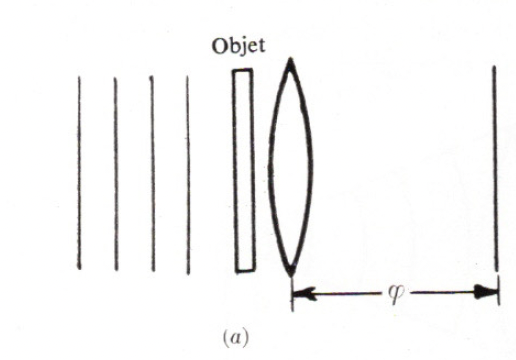

In [2]:
Image(filename = "Figs/fig_lensobjdiffraction.png",width=500,height=100)

## Object behind the lens

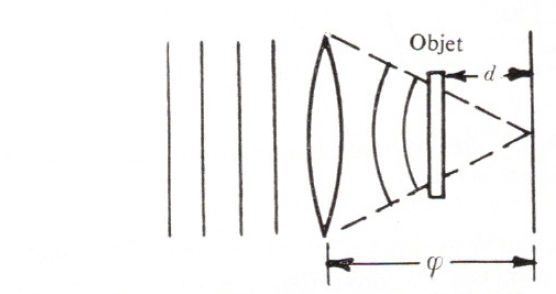

In [3]:
Image(filename = "Figs/fig_objbehindlensdiffraction.png",width=500,height=100)

$$
U_\phi(x_\phi,y_\phi) = \frac{A \exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} \int \int t_0(x,y) P(x \frac{\phi}{d}, y\frac{\phi}{d}) \times \exp \left\{ -j \frac{2 \pi}{\lambda d}(x x_\phi+ y y_\phi) \right\} dx dy
$$

- Note the $\phi$ is replaced by the $d$
- $P(x,y)$ pupil function of the lens such that $P(x \frac{\phi}{d}, y\frac{\phi}{d})$ constrains to the focused beam size at object position
- $U_\phi(x_\phi,y_\phi)$ is proportional to the Fourier transform of $t_0(x,y) P(x \frac{\phi}{d}, y\frac{\phi}{d})$ at frequency $(f_X,f_Y) = (\frac{x_\phi}{\lambda d}, \frac{y_\phi}{\lambda d}) = (\frac{\alpha}{\lambda }, \frac{\beta}{\lambda})$
- $(\alpha,\beta))$ incident angles in $(X-Z,Y-Z)$ planes

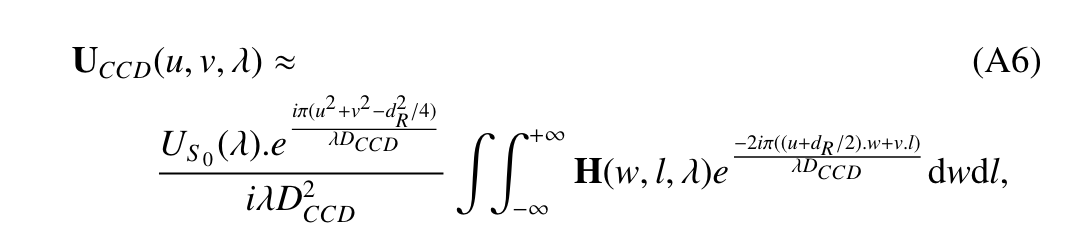

In [4]:
Image(filename = "Figs/fig_holo_udiffformula.png",width=500,height=100)

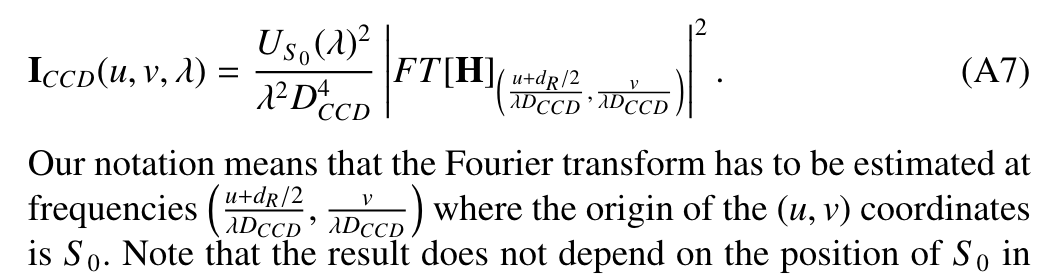

In [5]:
Image(filename = "Figs/fig_holo_idiffformula.png",width=500,height=100)

## Summary

### Define the Fourier Transform

$$
{\cal F_t(x_z,y_z,z,\lambda)} =\int \int t(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda z}(x x_z+y y_z)\right\} dx dy
$$

$$
{\cal G_t(\alpha,\beta,\lambda)} =\int \int t(x,y) \times \exp 
\left\{ -j \frac{2 \pi}{\lambda}(\alpha\cdot x+\beta \cdot y)\right\} dx dy
$$
- $\alpha = x_\phi/\phi, \beta = y_\phi/\phi$
- $\alpha^\prime = x_\phi/d, \beta^\prime = y_\phi/d$
- $\alpha^\prime = \frac{\phi}{d}\alpha, \beta^\prime = \frac{\phi}{d}\beta$ 

### Diffraction of an aperture in a converging beam at Focal Plane

$$
U(x_\phi,y_\phi) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k}{2\phi}(x_{\phi}^2+y_{\phi}^2) \right) 
{\cal F}_P(x_\phi,y_\phi,\phi,\lambda)
$$

$$
U(\alpha,\beta) = \frac{exp(jk\phi)}{jk\phi} \exp\left(j \frac{k.z^2}{2\phi}(\alpha^2+\beta^2) \right) 
{\cal G}_P(\alpha,\beta,\lambda)
$$

### Diffraction by an object of transmission in the beam at distance d from CCD 

$$
U_\phi(x_\phi,y_\phi) = \frac{\exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} {\cal F}_{Pt}(x_\phi,y_\phi,d,\lambda)
$$

$$
U_\phi(\alpha^\prime,\beta^\prime) = \frac{\exp \left\{j \frac{k}{2d}(x_\phi^2 + y_\phi^2) \right\}}{j \lambda d} \frac{\phi}{d} {\cal G}_{Pt}(\alpha^\prime,\beta^\prime,\lambda)
$$

## Poppy Diffraction example

- Use Auxtel aperture telescope

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u
poppy.__version__

'1.1.2.dev134+gb058985'

In [7]:
import logging
#logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

#### Auxtel configuration

In [8]:
# wavelength in m
wl = 0.5e-6
# pixel scale
# 10 microns pixel , 105 microns per arcsec
pix_scale = 10.0/105.0 # arcsec per pixel
fov_arcsec = 5.0 # must restrict the FOV in focl plane to avoid aliasing
# diameter in m
D = 1.2
Fnum = 18
# focal length
FL = D*Fnum
# Dccd
Dccd = 180e-3
# beam radius at object positon
beam_radius=  D/2/FL*Dccd

### Auxtel telescope Aperture definition

In [9]:
4096+1024

5120

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Computing amplitude for Circle, radius=0.6 m sampled onto 5120 pixel grid with pixelscale 0.0003515625 m / pix
INFO:poppy:Computing both for Circle, radius=0.6 m sampled onto 512 pixel grid with pixelscale 0.0035156249999999997 m / pix


(<Axes: title={'center': 'Transmittance for Circle, radius=0.6 m'}, ylabel='[meters]'>,
 <Axes: title={'center': 'OPD for Circle, radius=0.6 m'}>)

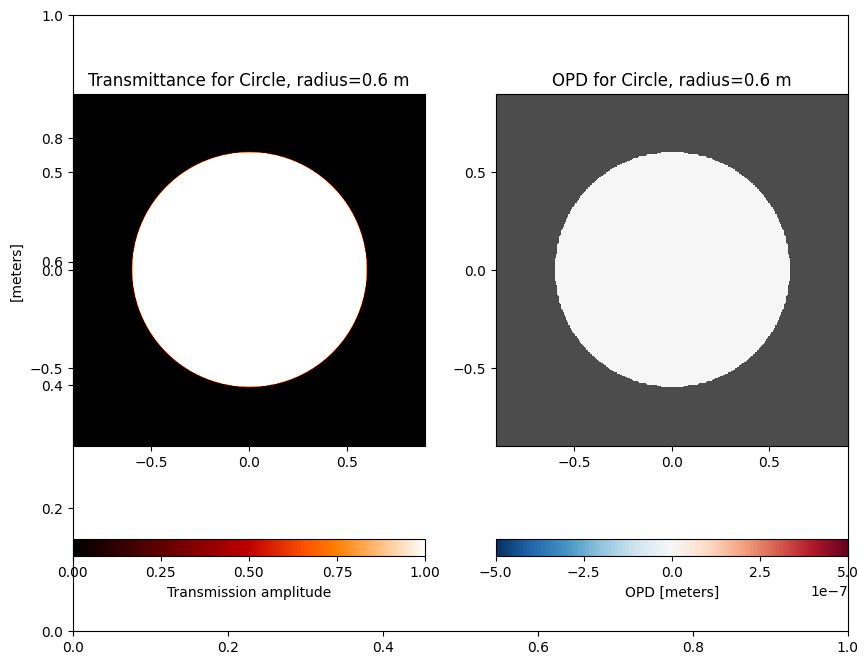

In [10]:
# number of bins
Nb = 5120
#Nb = 4096
oversampling=20
osys = poppy.OpticalSystem(oversample=oversampling)
ap = poppy.CircularAperture(radius=D/2.)
values = ap.sample(npix = Nb) 

fig,ax = plt.subplots(1,1,figsize=(10,8)) 
ap.display(colorbar=True,what='both',ax=ax)

### Add a detector plane and show the PSF

INFO:poppy:Added pupil plane: Circle, radius=0.6 m
INFO:poppy:Added detector with pixelscale=0.09523809523809523 and oversampling=20: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5e-07 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
INFO:poppy:  Calculation completed in 0.095 s
INFO:poppy:PSF Calculation completed.


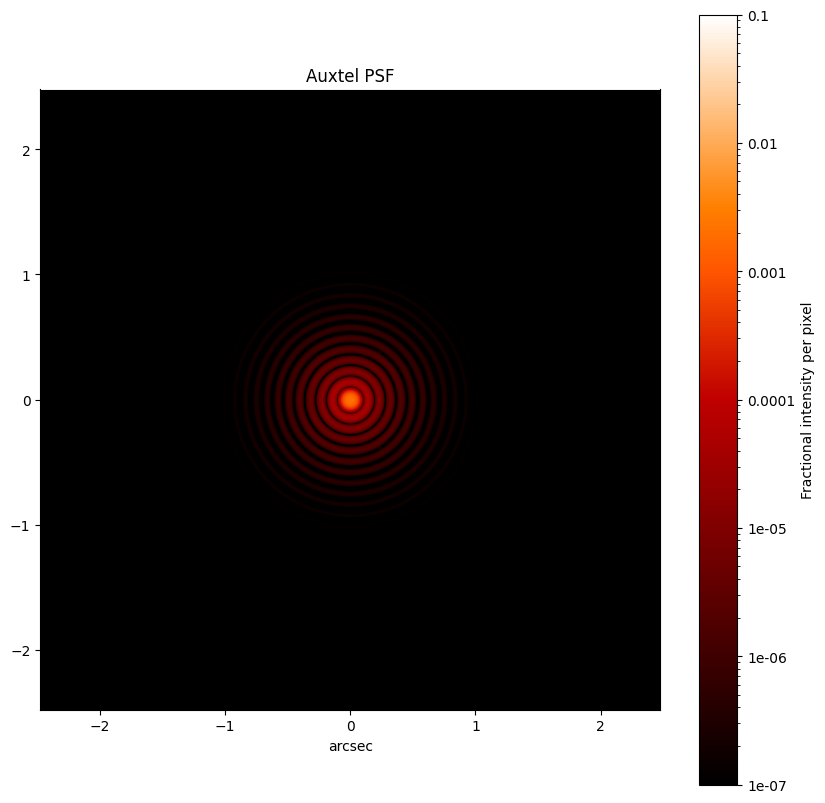

In [11]:
 # evaluate on 1024 x 1024 grid
osys.add_pupil(ap)    # pupil radius in meters
osys.add_detector(pixelscale=pix_scale, fov_arcsec=fov_arcsec)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wl,display_intermediates=False)   # wavelength in microns
fig,ax = plt.subplots(1,1,figsize=(10,10)) 
poppy.display_psf(psf, title='Auxtel PSF',ax=ax) 
plt.savefig('example_airy.png', dpi=100)

In [12]:
psf[0].data.shape

(1040, 1040)

In [13]:
fov_arcsec/pix_scale

52.5

### Fast Fourier transform

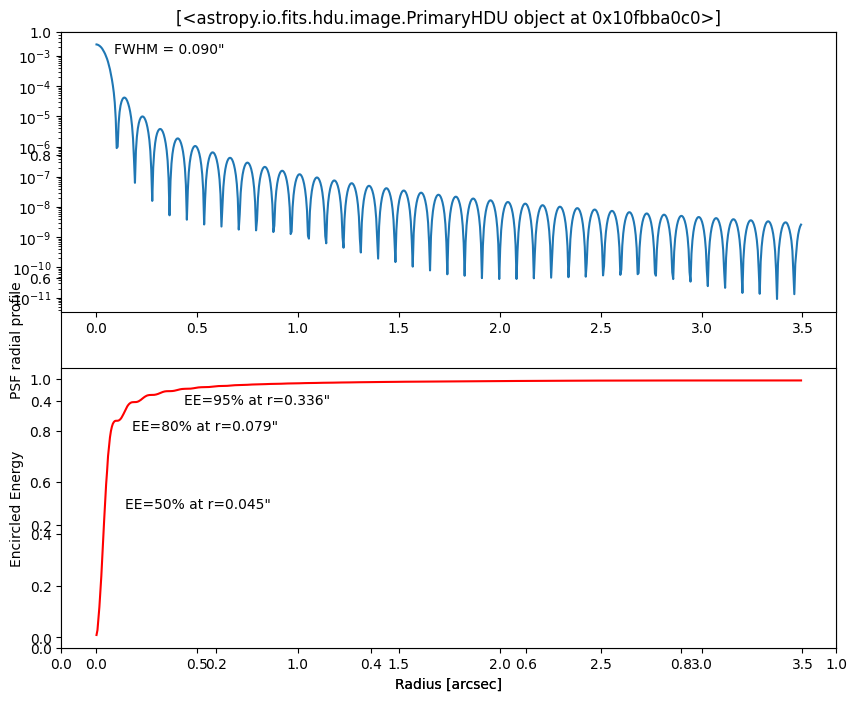

In [14]:
plt.figure(figsize=(10,8))
poppy.display_profiles(psf)

## Simple Ronchi pattern

In [15]:
Neff= 150. # number of lines per mm

In [16]:
def pupil_function(x,y,D=D,fl=FL,d=Dccd):
    """
    Size of the Beam at Optical element position
    """

    R = np.sqrt(x**2+y**2)*fl/d
    value = np.where(R<D/2.,1,0)
    return value

In [17]:
nx, ny = (500, 500)
x = np.linspace(-0.01,0.01 ,nx)
y = np.linspace(-0.01,0.01, ny)
xv, yv = np.meshgrid(x, y)
z = pupil_function(xv,yv)

Text(0.5, 1.0, 'pupil function at object position')

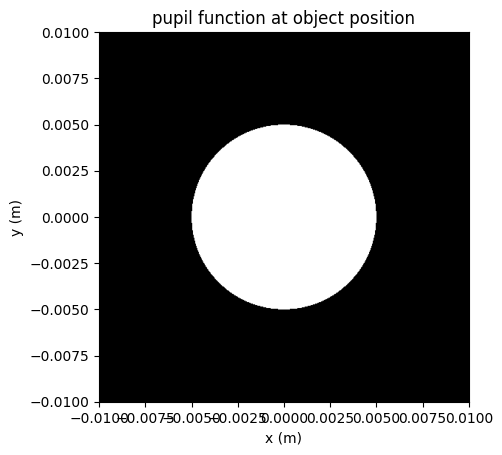

In [18]:
fig,ax = plt.subplots(1,1)
ax.imshow(z,extent=[x.min(),x.max(),y.min(),y.max()],cmap="gray")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_title("pupil function at object position")

In [19]:
def set_ronchi_transmission_debug(x,opticalelement_nblines_permm=150):
    """
    Generate a square pattern of transmission.
    x in mm
    """
    a = 1/opticalelement_nblines_permm
    return np.rint(x/a-0.25 - np.floor(x/a-0.25))

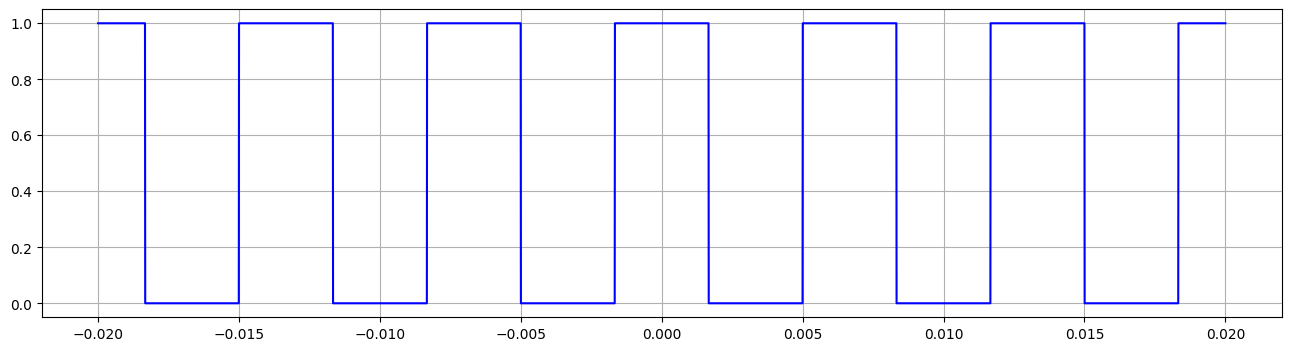

In [20]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
x = np.linspace(-0.02,0.02,5000)
y = set_ronchi_transmission_debug(x)
ax.plot(x,y,'b-')
ax.grid()

In [21]:
def set_ronchi_transmission(x,y,wl,opticalelement):
    """
    """
    nblines_perm = opticalelement.nblines_permm*1000.
    a = 1/nblines_perm 
    #pupil = pupil_function(x,y)
    # the aperture stop must be defined before the the optical element
    return np.rint(x/a-0.25 - np.floor(x/a-0.25))

In [22]:
def set_ronchi_opd(x,y,wl,opticalelement):
    """
    """
    return 0

In [23]:
class myRonchiGratingOptic(poppy.AnalyticOpticalElement):
    def __init__(self, *args, **kwargs):
        """ If your optic has adjustable parameters, then save them as attributes here """
        super().__init__(**kwargs)
        # number of line per mm
        self.nblines_permm = Neff 
    def get_opd(self,wave):
        y, x = self.get_coordinates(wave)
        opd = set_ronchi_opd(x,y, wave.wavelength, self)
        return opd

    def set_transmission(self, wave):
        y, x = self.get_coordinates(wave)
        transmission = set_ronchi_transmission(x,y, wave.wavelength, self)
        return transmission

    # behind the scenes poppy  will calculate:
    #    phasor = transmission = np.exp(1.j * 2 * np.pi / wave.wavelength * op

In [24]:
myoptic = myRonchiGratingOptic(oversample=10)
values = myoptic.sample(npix=Nb)  

INFO:poppy:Computing amplitude for unnamed optic sampled onto 5120 pixel grid with pixelscale 0.0001953125 m / pix


INFO:poppy:Initialized OpticalSystem: Auxtel + Ronchi
INFO:poppy:Computing amplitude for Circle, radius=0.005 m sampled onto 5120 pixel grid with pixelscale 2.9296875e-06 m / pix
INFO:poppy:Added pupil plane: Circle, radius=0.005 m
INFO:poppy:Added pupil plane: unnamed optic
INFO:poppy:Added detector with pixelscale=0.09523809523809523 and oversampling=1: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 5e-07 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
INFO:poppy:  Calculation completed in 0.255 s
INFO:poppy:PSF Calculation completed.


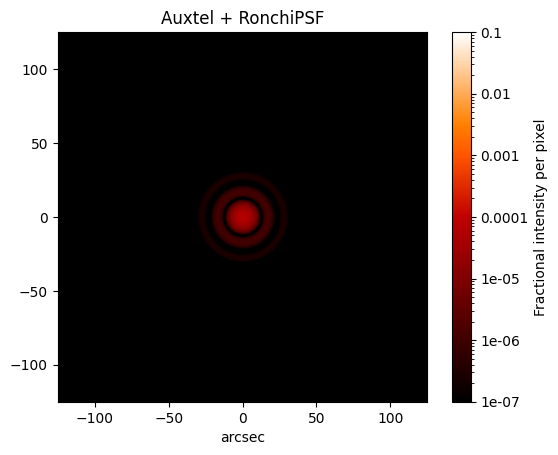

In [25]:
osys = poppy.OpticalSystem("Auxtel + Ronchi", oversample=1)
ap= poppy.CircularAperture(radius=beam_radius)
ap.sample(npix=Nb)
#osys.add_pupil(poppy.CircularAperture(radius=D/2))  
osys.add_pupil(ap)  
osys.add_pupil(myoptic)
osys.add_detector(pixelscale=pix_scale, fov_arcsec=50*fov_arcsec)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wl)                            # wavelength in microns
poppy.display_psf(psf, title='Auxtel + RonchiPSF') 

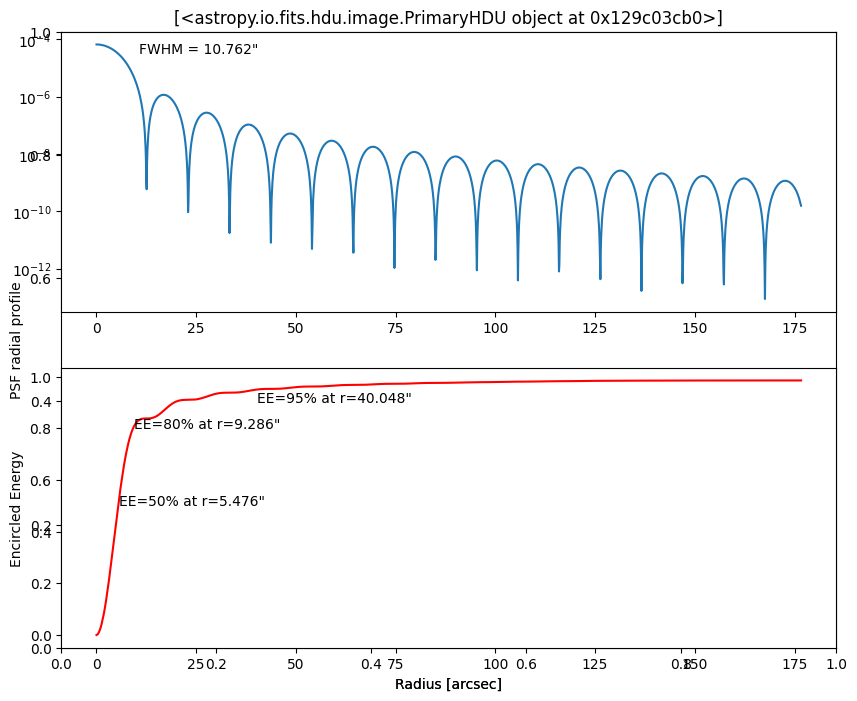

In [26]:
plt.figure(figsize=(10,8))
poppy.display_profiles(psf)

## Fast Fourier transform and performances of poppy to describe gratings